In [1]:
#Logistic Regression is often used for classification
#Linear regression always have input and ouput
# Logistic regression is indirect; giving probability of output

Problems of Linear Regression; the core concept is simply
to minimize the error between our points and predicted value (line)
Input: Temperature
Output: Fever or no fever

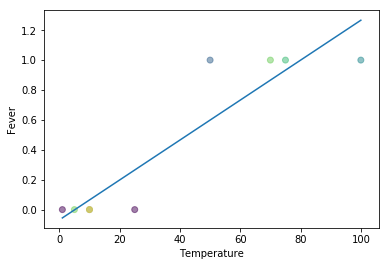

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = [1, 5, 10, 10, 25, 50, 70, 75, 100]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

Problem 1: Fever value can go negative (below 0) and positive(above 1)

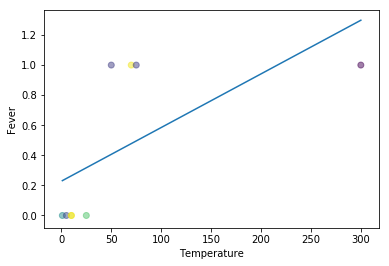

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = [1, 5, 10, 10, 25, 50, 70, 75, 300]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

replacing 100 temperature value with 300 becomes a problem;
fever points not predicted with outliers;
lineasr regression is not made for classification problems

In [4]:
#Logistic Regression In-Depth
#this goes the extra mile-
# Inputs(x) --> Logits(y) --> Softmax(g(y)) --> True Labels(L)
# After softmax we compare our output with true labels by using
# cross entropy; measuring the distanace btw output and true labels

# Logistic regression adds a logistic function on top of the linear funtion
# and gives probability

# After the logistic function, we have the softmax function
# Softmax function: multi-class logistic regression; predicting more
# than two classes: S=g(y)

# Then we use cross entropy function to measure the distance btw
# the probabilities(S) and Labels (L) - D(S, L)
# D(S, L) = LlogS - (1-L)log(1-S)


In [6]:
import math
print(-math.log(1 - 0.00001))
print(-math.log(1 - 0.99999))

print(math.log(0.99999))
print(math.log(0.00001))

1.0000050000287824e-05
11.51292546497478
-1.0000050000287824e-05
-11.512925464970229


In [7]:
# In Linear regression we have Mean Square Error as Loss
# In Logistic regression, we have the cross entropy as Loss
# So we need to minimize our Cross entropy Loss

Steps:
    -Load Dataset,
    -Make Dataset iterable,
    -Create Model Class,
    -Instantiate Model Class,
    -Instantiate Loss Class,
    -Instantiate Optimizer Class,
    -Train Model

In [8]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [9]:
train_dataset = dsets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

Processing...
Done!


In [10]:
len(train_dataset)

60000

In [11]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [12]:
type(train_dataset[0])

tuple

In [13]:
# Input Matrix
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [14]:
# Label
train_dataset[0][1]

tensor(5)

In [15]:
# Displaying MNIST

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [16]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [17]:
show_img = train_dataset[0][0].numpy().reshape(28, 28)

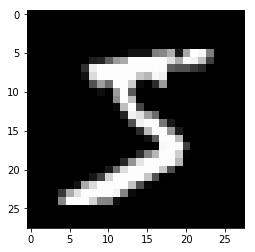

In [18]:
plt.imshow(show_img, cmap='gray')

In [19]:
# Lable
train_dataset[0][1]

tensor(5)

In [20]:
show_img = train_dataset[1][0].numpy().reshape(28, 28)

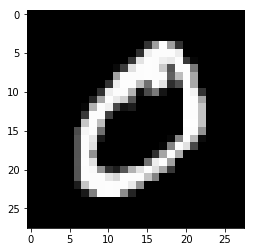

In [21]:
plt.imshow(show_img, cmap='gray')

In [22]:
# Label
train_dataset[1][1]

tensor(0)

In [24]:
# Loading MNIST Test Dataset
# this is to show our algorithm works beyond the data we have trained on
# Also we need to check if our model has over trained; overfitting

test_dataset = dsets.MNIST(root='./data',
                          train=False,
                          transform=transforms.ToTensor())

In [25]:
len(test_dataset)

10000

In [26]:
type(test_dataset)

torchvision.datasets.mnist.MNIST

In [27]:
# Image matrix
test_dataset[0][0].size()

torch.Size([1, 28, 28])

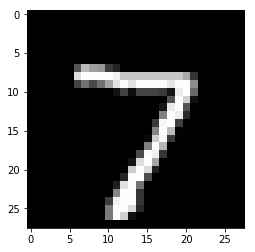

In [28]:
show_img = test_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')